<a href="https://colab.research.google.com/github/Beh-noush/RL-course/blob/main/RL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10-Armed Bandit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tqdm


In [ ]:
class bandit():
  def __init__(self, num_arms):
    self.num_arms = num_arms
    self.arms_array = np.random.randn(self.num_arms)
  def __str__(self):
    return ( f' bandit with {self.num_arms} arms with action values {self.arms_array} respectively')
  def pull(self, arm):
    '''
    Inputs:
          arm: integer
          the index of arm going from 0 to num_arms-1.

    Returns:
         float number
         Action value of the given arm
    '''
    return np.random.normal(self.arms_array[arm], 1)

In [ ]:
b = bandit(10)

In [ ]:
print(b)

 bandit with 10 arms with action values [ 0.95178875  0.41387445 -0.81507953  0.96278514 -2.08070376  1.75321522
 -0.71769927  0.5160645  -0.85888987  0.38924645] respectively


In [ ]:
b.pull(3)

0.9732667944210057

\epsilon-greedy method with 1000 pulls.

In [ ]:
# #1 - Define the sample averaged action value
# def sample_av_action_val(bandit, arm, num):
#   if num ==1:
#     return bandit.pull(arm)
#   else:
#     return sample_av_action_val(bandit, arm, num-1) + bandit.pull(arm)/num


In [ ]:
#Greedy  First
num_arms = 10
num_pulls = 1000
my_bandit =  bandit(num_arms)
action_val = np.zeros(num_arms)
num_pull_arm = np.zeros(num_arms)
total_rew = 0
av_reward_list = []
count = 0
for pull in range(num_pulls):
  count += 1
  arm = np.argmax(action_val)
  num_pull_arm[arm]  +=1
  reward = my_bandit.pull(arm)
  total_rew += reward
  av_reward_list.append(total_rew/count)
  action_val[arm] += reward/num_pull_arm[arm]



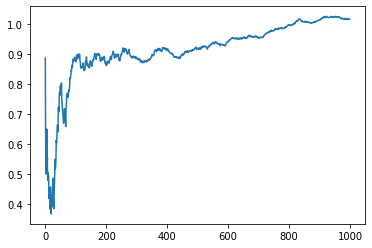

In [ ]:
plt.plot( list(range(num_pulls)), av_reward_list)

In [ ]:
#Now, epsilon-Greedy
epsilon = 0.1
num_arms = 10
num_pulls = 1000

def train_bandit(epsilon, num_arms = 10 ,num_pulls = 1000, optimistic = False, optim_action_value=None ):
    my_bandit =  bandit(num_arms)
    action_val = np.zeros(num_arms)
    if optimistic:
      action_val = optim_action_value*np.ones(num_arms)

    num_pull_arm = np.zeros(num_arms)
    total_rew = 0
    av_reward_list = []
    count = 0
    greedy = True
    for pull in range(num_pulls):
      random_num = np.random.uniform(0,1)
      if random_num>epsilon:
        greedy = True
      else:
        greedy = False
      count += 1
      if greedy:
        arm = np.argmax(action_val)
      else:
        arm = np.random.randint(0,10)
      num_pull_arm[arm]  +=1
      reward = my_bandit.pull(arm)
      total_rew += reward
      av_reward_list.append(total_rew/count)
      action_val[arm] += reward/num_pull_arm[arm]
    return av_reward_list

In [ ]:
import tqdm
n_run = 2000
reward_array_1 = np.zeros(num_pulls)
reward_array_2 = np.zeros(num_pulls)
reward_array_3 = np.zeros(num_pulls)
reward_array_4 = np.zeros(num_pulls)
for n in range(n_run):
  reward_array_1 += train_bandit(.1)
  reward_array_2 += train_bandit(.01)
  reward_array_3 += train_bandit(0.)
  reward_array_4 += train_bandit(.9)
reward_array_1 = reward_array_1/n_run
reward_array_2 = reward_array_2/n_run
reward_array_3 = reward_array_3/n_run
reward_array_4 = reward_array_1/n_run


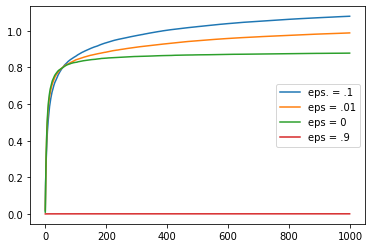

In [ ]:
plt.plot( list(range(num_pulls)), reward_array_1, label= 'eps. = .1')
plt.plot( list(range(num_pulls)), reward_array_2, label = 'eps = .01')
plt.plot( list(range(num_pulls)), reward_array_3, label = 'eps = 0')
plt.plot( list(range(num_pulls)), reward_array_4, label = 'eps = .9')
plt.legend()

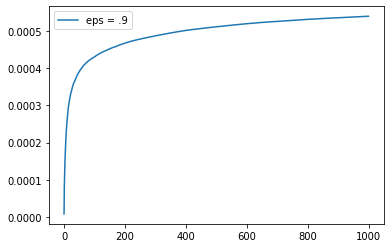

In [ ]:
plt.plot( list(range(num_pulls)), reward_array_4, label = 'eps = .9')
plt.legend()

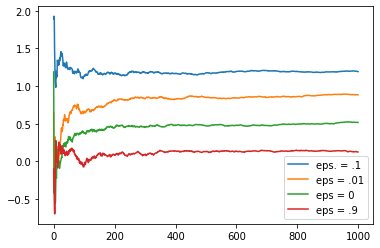

In [ ]:
plt.plot( list(range(num_pulls)), av_reward_list_1, label= 'eps. = .1')
plt.plot( list(range(num_pulls)), av_reward_list_2, label = 'eps = .01')
plt.plot( list(range(num_pulls)), av_reward_list_3, label = 'eps = 0')
plt.plot( list(range(num_pulls)), av_reward_list_4, label = 'eps = .9')
plt.legend()

Optimistice versus non_optimistic

In [ ]:
from tqdm import tqdm
n_run = 2000
reward_array_optim = np.zeros(num_pulls)
for n in tqdm(range(n_run), position = 0, leave = True ):
  reward_array_optim += train_bandit(0, optimistic= True, optim_action_value= 3)
reward_array_optim = reward_array_optim/n_run


100%|██████████| 2000/2000 [00:31<00:00, 63.59it/s]


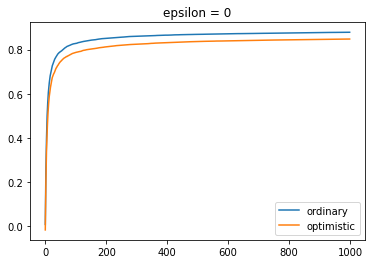

In [ ]:
plt.title('epsilon = 0')
plt.plot( list(range(num_pulls)), reward_array_3, label = 'ordinary')
plt.plot( list(range(num_pulls)), reward_array_optim, label = 'optimistic')
plt.legend()


In [ ]:
from tqdm import tqdm
n_run = 2000
reward_array_optim_100 = np.zeros(num_pulls)
for n in tqdm(range(n_run), position = 0, leave = True ):
  reward_array_optim_100 += train_bandit(0, optimistic= True, optim_action_value= 100)
reward_array_optim_100 = reward_array_optim_100/n_run


100%|██████████| 2000/2000 [00:30<00:00, 65.86it/s]


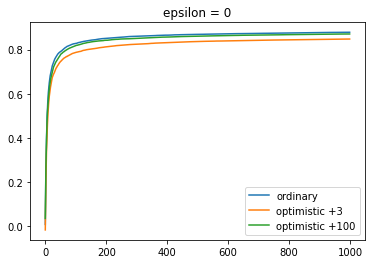

In [ ]:
#Q-5 
plt.title('epsilon = 0')
plt.plot( list(range(num_pulls)), reward_array_3, label = 'ordinary')
plt.plot( list(range(num_pulls)), reward_array_optim, label = 'optimistic +3')
plt.plot( list(range(num_pulls)), reward_array_optim_100, label = 'optimistic +100')
plt.legend()


In [ ]:
a

[1, 2, 3, 4]

In [ ]:
import math
math.log(2)/np.array(a)

array([0.69314718, 0.34657359, 0.23104906, 0.1732868 ])

In [ ]:
num_arms = 10
c= 2
num_pulls = 1000
my_bandit =  bandit(num_arms)
action_val = np.zeros(num_arms)
c = 2
num_pull_arm = np.zeros(num_arms) #How many times a specific arm was chosen.
total_rew = 0 #The whole reward accumulated over all pulls
av_reward_list = [] #average means the average of the total reward till time t, over the number of pulls till then
count = 0

for pull in range(num_pulls):
  count += 1
  arm = np.argmax(action_val + c* (math.log(count)/(.1+num_pull_arm))**(.5))


In [ ]:
c = 2
c*(math.log(count)/(.1+num_pull_arm))**(.5)

array([16.62258136, 16.62258136, 16.62258136, 16.62258136, 16.62258136,
       16.62258136, 16.62258136, 16.62258136, 16.62258136, 16.62258136])

In [ ]:
#Q-6: UCB algorithm

#Now, epsilon-Greedy
import math
num_arms = 10
num_pulls = 1000

def train_bandit_ucb(c, num_arms = 10 ,num_pulls = 1000 ):
    my_bandit =  bandit(num_arms)
    action_val = np.zeros(num_arms)
    # if optimistic:
    #   action_val = optim_action_value*np.ones(num_arms)

    num_pull_arm = np.zeros(num_arms) #How many times a specific arm was chosen.
    total_rew = 0 #The whole reward accumulated over all pulls
    av_reward_list = [] #average means the average of the total reward till time t, over the number of pulls till then
    count = 0
  #  greedy = True
    for pull in range(num_pulls):
      # random_num = np.random.uniform(0,1)
      # if random_num>epsilon:
      #   greedy = True
      # else:
      #   greedy = False
      count += 1
    #  if greedy:
      arm = np.argmax(action_val + c* (math.log(count)/(.1+num_pull_arm))**(.5))
      # else:
      #   arm = np.random.randint(0,10)
      num_pull_arm[arm]  +=1
      reward = my_bandit.pull(arm)
      total_rew += reward
      av_reward_list.append(total_rew/count)
      action_val[arm] += reward/num_pull_arm[arm]
    return av_reward_list


In [ ]:
# For c= .2, 1, 5
n_run = 2000
num_pulls = 1000
reward_1 = np.zeros(num_pulls)
reward_2 = np.zeros(num_pulls)
reward_3 = np.zeros(num_pulls)
for n in tqdm(range(n_run), position= 0 , leave = True):
  reward_1 += train_bandit_ucb(.2)
  reward_2 += train_bandit_ucb(1)
  reward_3 += train_bandit_ucb(5)
reward_1 = reward_1/n_run
reward_2 = reward_2/n_run
reward_3 = reward_3/n_run


100%|██████████| 2000/2000 [02:03<00:00, 16.25it/s]


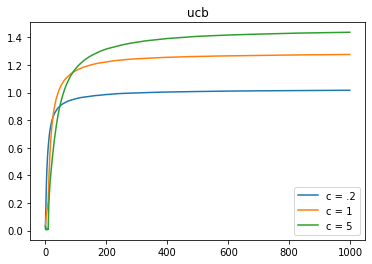

In [ ]:
#Q-5 
plt.title('ucb')
plt.plot( list(range(num_pulls)), reward_1, label = 'c = .2')
plt.plot( list(range(num_pulls)), reward_2, label = 'c = 1 ')
plt.plot( list(range(num_pulls)), reward_3, label = 'c = 5')
plt.legend()


Gradient bandit

In [ ]:
def softmax(a):
  '''
  input: numpy array

  output: numpy array of the same size as input 
  '''
  partition_func = np.sum(np.exp(a))
  return np.exp(a)/partition_func


In [ ]:
softmax([1,-3,7,-500])#.sum()

array([2.47251118e-003, 4.52856220e-005, 9.97482203e-001, 6.48041518e-221])

In [ ]:
def sample_softmax(vec):
  '''
  input: numpy array (vector)
         vector summing up to 1 containing the values of the softmax function
  output: int
         the index of the chosen entry of the vector
  '''
  length = len(vec)
  l = [(0, vec[0])]

  for i in range(1, length):
    l.append(  (l[i-1][1], l[i-1][1]+vec[i])  )
  random_number = np.random.uniform(0,1)
  for i,j in enumerate(l):
    if j[0] <=random_number<= j[1]:
      return i
    # else:
    #   print(f'random_number = {random_number}')
    #   print(vec,l)

In [ ]:
b = softmax(np.array([1,2,3,4]))
b

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [ ]:
sample_softmax(b)

random_number = 0.6012408072734424
[(0, 0.03205860328008499), (0.03205860328008499, 0.11920292202211756), (0.11920292202211756, 0.3560857401120277), (0.3560857401120277, 1.0)]
random_number = 0.6012408072734424
[(0, 0.03205860328008499), (0.03205860328008499, 0.11920292202211756), (0.11920292202211756, 0.3560857401120277), (0.3560857401120277, 1.0)]
random_number = 0.6012408072734424
[(0, 0.03205860328008499), (0.03205860328008499, 0.11920292202211756), (0.11920292202211756, 0.3560857401120277), (0.3560857401120277, 1.0)]


3

In [ ]:
#Q-7: Gradient bandit
#Here, instead of taking sample average, we use updated prefernce functions.
#So, preference functions are initialized to zero. We define probability of taking each action through a softmax function over the prefernce vector. 
#Then, the probability is updated by comparing the immediate reward at each step with the average reward until that step. 
#After each prob. update, one bandit arm is taken by the corresponding probability, through a sampling process. 

 
def gradient_bandit(num_arms, num_pulls):
  my_bandit = bandit(num_arms)
  preferences = np.zeros(num_arms)
  probabilities = softmax(preferences)
  total_reward = 0
  total_rew_av = 0
  av_rew = []
  arm = np.random.randint(num_arms)
  count = 0
  for n in range(num_pulls):
    count += 1
    rew = my_bandit.pull(arm)
    probabilities += (rew - total_reward)*( - probabilities)
    probabilities[arm] += (rew - total_reward)
    arm = sample_softmax(probabilities)
    total_reward += rew
    total_rew_av = total_reward/count
    av_rew.append(total_rew_av)

  return av_rew


In [ ]:
my_bandit.pull(None)

array([[-0.31978232,  0.00722898, -0.21009193, -2.9543908 , -0.5919176 ,
         0.90316578,  3.21408848,  1.30375234, -1.86159506, -0.05627898]])

In [ ]:
np.array()

-200.0

In [ ]:
  num_arms = 10
  num_pulls = 2000
  my_bandit = bandit(num_arms)
  preferences = np.zeros(num_arms)
  probabilities = softmax(preferences)
  total_reward = 0
  total_rew_av = 0
  av_rew = []
  arm = np.random.randint(num_arms)
  count = 0
  for n in range(num_pulls):
    count += 1
    rew = my_bandit.pull(arm)
    preferences += .4*(rew - total_reward)*( - probabilities)
    preferences[arm] += .4*(rew - total_reward)
    probabilities = softmax(preferences)

    arm = sample_softmax(probabilities)
    total_reward += rew
    total_rew_av = total_reward/count
    av_rew.append(total_rew_av)


In [ ]:
print(my_bandit)

 bandit with 10 arms with action values [ 1.69162365  0.27802074 -0.79141885 -0.42227662  1.50305839 -0.96878696
 -0.04613159  0.29096601  0.46984134  0.02626467] respectively


In [ ]:
my_bandit.pull(9)

0.8320945365937604

In [ ]:
arm

In [ ]:
my_bandit.pull(np.random.randint(num_arms))

-0.9929023440124931

In [ ]:
rew 

2.3515366350399316

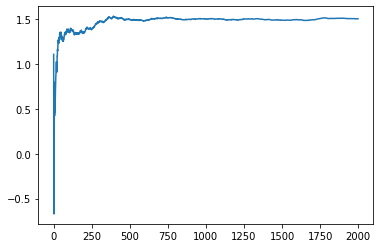

In [ ]:
plt.plot(list(range(num_pulls)), av_rew)

In [ ]:
Thank total_reward

-158.22932108950346

In [ ]:
my_bandit.pull(1)

-0.1641208985965159

In [ ]:
  num_arms = 10
  num_pulls = 200
  my_bandit = bandit(num_arms)

In [ ]:
my_bandit.pull([1,2])

array([ 2.45744187, -0.9715286 ])